# Vibrato Monte Carlo & Automatic differentiation

In [2]:
%reset -f
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
def savefig(filename):
    plt.savefig('outputs/{}.pdf'.format(filename))

In [4]:
# Figures configuration
width = 7
height = width / 1.618

preamble = r"\usepackage[utf8x]{inputenc}, \usepackage[T1]{fontenc}"
plt.rc('pgf', texsystem='pdflatex', preamble=preamble)
plt.rc('figure', figsize=[width, height], autolayout=True)
plt.rc('font', size=13, family='Serif')
plt.rc('text', usetex=True)
plt.rc('lines', linewidth=1.2)
plt.rc('axes.spines', top=False, right=False)
plt.rc('axes', labelsize=14, grid=False, titlesize=16, titlepad=22)
plt.rc('axes3d', grid=False)
plt.rc('xtick', direction='in', labelsize=14)
plt.rc('ytick', direction='in', labelsize=14)
plt.rc('xtick.minor', visible=True, size=4)
plt.rc('ytick.minor', visible=True, size=4)
plt.rc('xtick.major', size=7.5)
plt.rc('ytick.major', size=7.5)


# Digital option BlackScholes (Put option)

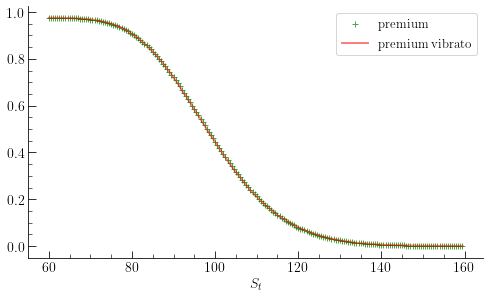

In [12]:
digicall_vanilla_premium_analytic = pd.read_csv('datasets/digicall_analytic_premium.csv', 
                                            header=None, names=['$S_t$', 'premium'], 
                                            sep=';', index_col=0)
digicall_vanilla_premium_vibrato = pd.read_csv('datasets/digicall_vibrato_premium.csv', 
                                            header=None, names=['$S_t$', 'premium vibrato'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
digicall_vanilla_premium_analytic.plot(ax=ax, color='green', lw=2, marker='+',ls='', alpha=.7);
digicall_vanilla_premium_vibrato.plot(ax=ax, color='red', lw=2, alpha=.5);

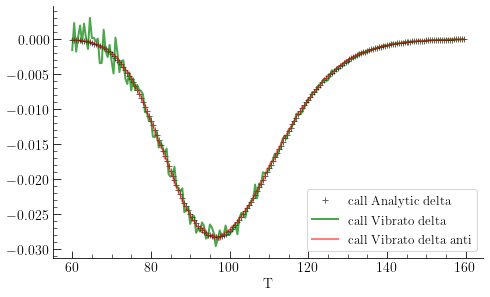

In [16]:
digicall_vanilla_delta_analytic = pd.read_csv('datasets/digicall_analytic_delta.csv', 
                                            header=None, names=['T', 'call Analytic delta'], 
                                            sep=';', index_col=0)
digicall_vanilla_delta_vibrato = pd.read_csv('datasets/digicall_vibrato_delta.csv', 
                                            header=None, names=['T', 'call Vibrato delta'], 
                                            sep=';', index_col=0)
digicall_vanilla_delta_vibrato_anti = pd.read_csv('datasets/digicall_vibrato_delta_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato delta anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_delta_analytic.plot(ax=ax, color='black', ls='',marker='+' , alpha=.6);
digicall_vanilla_delta_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
digicall_vanilla_delta_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

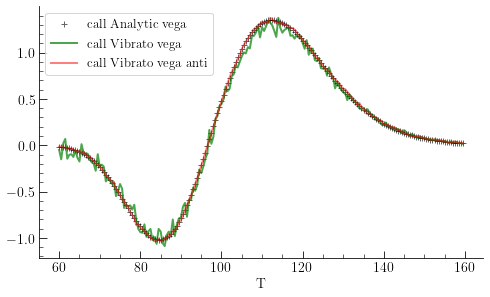

In [17]:
digicall_vanilla_vega_analytic = pd.read_csv('datasets/digicall_analytic_vega.csv', 
                                            header=None, names=['T', 'call Analytic vega'], 
                                            sep=';', index_col=0)
digicall_vanilla_vega_vibrato = pd.read_csv('datasets/digicall_vibrato_vega.csv', 
                                            header=None, names=['T', 'call Vibrato vega'], 
                                            sep=';', index_col=0)
digicall_vanilla_vega_vibrato_anti = pd.read_csv('datasets/digicall_vibrato_vega_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato vega anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_vega_analytic.plot(ax=ax, color='black', ls='',marker='+' , alpha=.6);
digicall_vanilla_vega_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
digicall_vanilla_vega_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

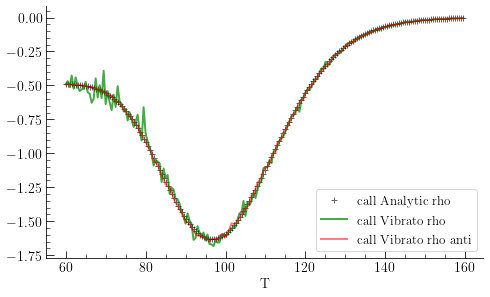

In [18]:
digicall_vanilla_rho_analytic = pd.read_csv('datasets/digicall_analytic_rho.csv', 
                                            header=None, names=['T', 'call Analytic rho'], 
                                            sep=';', index_col=0)
digicall_vanilla_rho_vibrato = pd.read_csv('datasets/digicall_vibrato_rho.csv', 
                                            header=None, names=['T', 'call Vibrato rho'], 
                                            sep=';', index_col=0)
digicall_vanilla_rho_vibrato_anti = pd.read_csv('datasets/digicall_vibrato_rho_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato rho anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_rho_analytic.plot(ax=ax, color='black', ls='',marker='+' , alpha=.6);
digicall_vanilla_rho_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
digicall_vanilla_rho_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

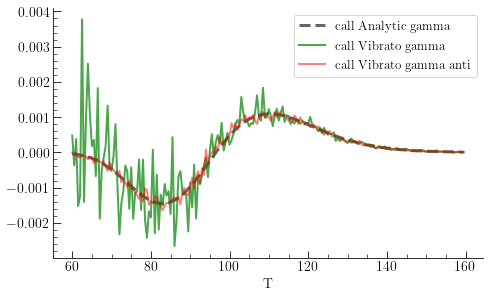

In [19]:
digicall_vanilla_gamma_analytic = pd.read_csv('datasets/digicall_analytic_gamma.csv', 
                                            header=None, names=['T', 'call Analytic gamma'], 
                                            sep=';', index_col=0)
digicall_vanilla_gamma_vibrato = pd.read_csv('datasets/digicall_vibrato_gamma.csv', 
                                            header=None, names=['T', 'call Vibrato gamma'], 
                                            sep=';', index_col=0)
digicall_vanilla_gamma_vibrato_anti = pd.read_csv('datasets/digicall_vibrato_gamma_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato gamma anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_gamma_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
digicall_vanilla_gamma_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
digicall_vanilla_gamma_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

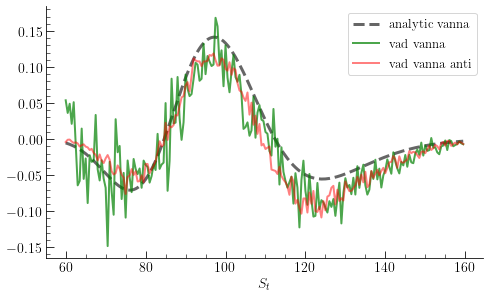

In [35]:
digicall_vanilla_vanna_analytic = pd.read_csv('datasets/digicall_analytic_vanna.csv', 
                                            header=None, names=['$S_t$', 'analytic vanna'], 
                                            sep=';', index_col=0)
digicall_vanilla_vanna_vibrato = pd.read_csv('datasets/digicall_vibrato_vanna.csv', 
                                            header=None, names=['$S_t$', 'vad vanna'], 
                                            sep=';', index_col=0)
digicall_vanilla_vanna_vibrato_anti = pd.read_csv('datasets/digicall_vibrato_vanna_antithetic.csv', 
                                            header=None, names=['$S_t$', 'vad vanna anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_vanna_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
digicall_vanilla_vanna_vibrato.div(100).plot(ax=ax, color='green', lw=2,alpha=.7);
digicall_vanilla_vanna_vibrato_anti.div(100).plot(ax=ax, color='red', lw=2, alpha=.5);

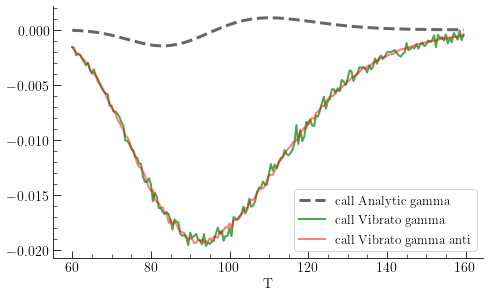

In [37]:
digicall_vanilla_gamma_analytic = pd.read_csv('datasets/digicall_analytic_gamma.csv', 
                                            header=None, names=['T', 'call Analytic gamma'], 
                                            sep=';', index_col=0)
digicall_vanilla_gamma_vibrato = pd.read_csv('datasets/digicall_vibratoad_gamma.csv', 
                                            header=None, names=['T', 'call Vibrato gamma'], 
                                            sep=';', index_col=0)
digicall_vanilla_gamma_vibrato_anti = pd.read_csv('datasets/digicall_vibratoad_gamma_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato gamma anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_gamma_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
digicall_vanilla_gamma_vibrato.mul(100).plot(ax=ax, color='green', lw=2,alpha=.7);
digicall_vanilla_gamma_vibrato_anti.mul(100).plot(ax=ax, color='red', lw=2, alpha=.5);

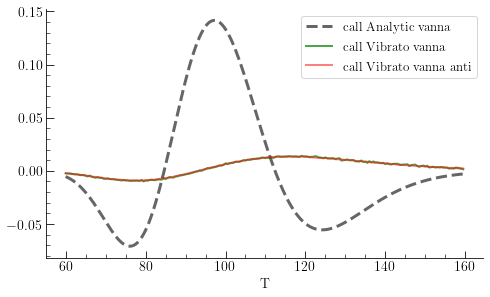

In [38]:
digicall_vanilla_vanna_analytic = pd.read_csv('datasets/digicall_analytic_vanna.csv', 
                                            header=None, names=['T', 'call Analytic vanna'], 
                                            sep=';', index_col=0)
digicall_vanilla_vanna_vibrato = pd.read_csv('datasets/digicall_vibratoad_vanna.csv', 
                                            header=None, names=['T', 'call Vibrato vanna'], 
                                            sep=';', index_col=0)
digicall_vanilla_vanna_vibrato_anti = pd.read_csv('datasets/digicall_vibratoad_vanna_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato vanna anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_vanna_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
digicall_vanilla_vanna_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
digicall_vanilla_vanna_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

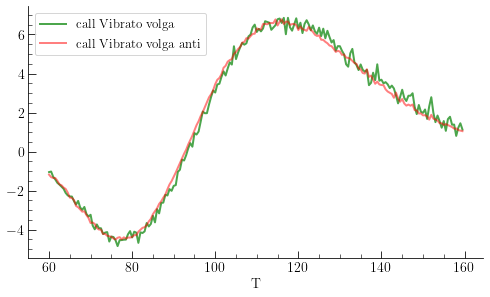

In [40]:
digicall_vanilla_volga_analytic = pd.read_csv('datasets/digicall_analytic_volga.csv', 
                                            header=None, names=['T', 'call Analytic volga'], 
                                            sep=';', index_col=0)
digicall_vanilla_volga_vibrato = pd.read_csv('datasets/digicall_vibratoad_volga.csv', 
                                            header=None, names=['T', 'call Vibrato volga'], 
                                            sep=';', index_col=0)
digicall_vanilla_volga_vibrato_anti = pd.read_csv('datasets/digicall_vibratoad_volga_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato volga anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
# digicall_vanilla_volga_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);

digicall_vanilla_volga_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
digicall_vanilla_volga_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);